# **Question 1**

## Load packges


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Initialization parameters

In [61]:
# These are the real world parameters of Hong Kong Flu in New York city
S0 = 7900000
I0 = 10
R0 = 0
beta = 1/2
gama = 1/3
N0 = S0 + I0 + R0
r0 = beta*N0/gama
n = 200
T = 1

## Define functions

In [62]:
# Derivation functions
# dsdt + didt + drdt = 0
def dsdt(t, s, i):
  return -(beta*s*i/N0)

def didt(t, s, i):
  return (beta*s*i/N0 - gama*i)

def drdt(t, i):
  return (gama*i)

In [63]:
# RK4 SIR model function
def RK4_SIR_model(s, i, r, N, n, T ):
  S = []
  I = []
  R = []
  S.append(s)
  I.append(i)
  R.append(r)
  for t in range(0,n):
    sk1 = T * dsdt(t, s, i)
    ik1 = T * didt(t, s, i)
    rk1 = T * drdt(t, i)

    sk2 = T * dsdt(t+T/2, s+sk1/2, i+ik1/2)
    ik2 = T * didt(t+T/2, s+sk1/2, i+ik1/2)
    rk2 = T * drdt(t+T/2, i+ik1/2)

    sk3 = T * dsdt(t+T/2, s+sk2/2, i+ik2/2)
    ik3 = T * didt(t+T/2, s+sk2/2, i+ik2/2)
    rk3 = T * drdt(t+T/2, i+ik2/2)

    sk4 = T * dsdt(t+T, s+sk3, i+ik3)
    ik4 = T * didt(t+T, s+sk3, i+ik3)
    rk4 = T * drdt(t+T, i+ik3)

    s = s + sk1/6 + sk2/3 + sk3/3 + sk4/6
    i = i + ik1/6 + ik2/3 + ik3/3 + ik4/6
    r = r + rk1/6 + rk2/3 + rk3/3 + rk4/6

    S.append(s)
    I.append(i)
    R.append(r)
  
  dic = {"S":S,"I":I,"R":R}
  return pd.DataFrame(dic)

## Test our RK4-SIR model 

In [64]:
x = []
for i in range(0,201):
  x.append(i)

### Test 1:   
the real world parameters of Hong Kong Flu in New York city

In [65]:
# We can change the different parameters to test our model
result = RK4_SIR_model(S0, I0, R0, N0, n, T)

# Add N colunm, because I want to see if the S+I+R=N
result["N"] = result["I"]+result["S"]+result["R"]
result.to_csv("/content/drive/MyDrive/BS6208 Big Data/result.csv")
# Show the result and find at every t, N is constant.
result

,S,I,R,N
0,7.900000e+06,10.000000,0.000000e+00,7900010.0
1,7.899995e+06,11.813584,3.627185e+00,7900010.0
2,7.899988e+06,13.956071,7.912189e+00,7900010.0
3,7.899981e+06,16.487107,1.297431e+01,7900010.0
4,7.899972e+06,19.477156,1.895449e+01,7900010.0
...,...,...,...,...
196,3.295782e+06,0.420346,4.604228e+06,7900010.0
197,3.295782e+06,0.371051,4.604228e+06,7900010.0
198,3.295782e+06,0.327536,4.604228e+06,7900010.0
199,3.295782e+06,0.289125,4.604228e+06,7900010.0


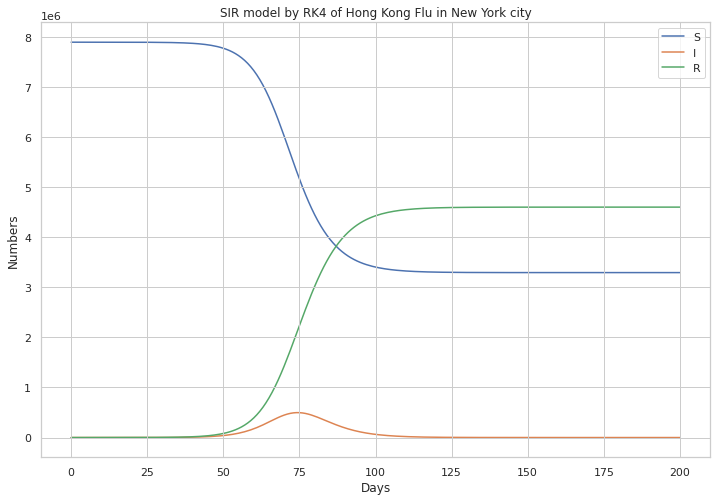

In [66]:
sns.set(context="notebook", style="whitegrid",
        rc={"axes.axisbelow": False})
plt.figure(figsize=(12,8))
sns.lineplot(x = x, y = result["S"])
sns.lineplot(x = x, y = result["I"])
sns.lineplot(x = x, y = result["R"])
plt.title("SIR model by RK4 of Hong Kong Flu in New York city")
plt.xlabel("Days")
plt.ylabel("Numbers")
plt.legend(["S","I","R"])

### Test 2
N0 = 1000

gama = 0.04

bata from 0.12 to 0.50

Ro = 1500.0


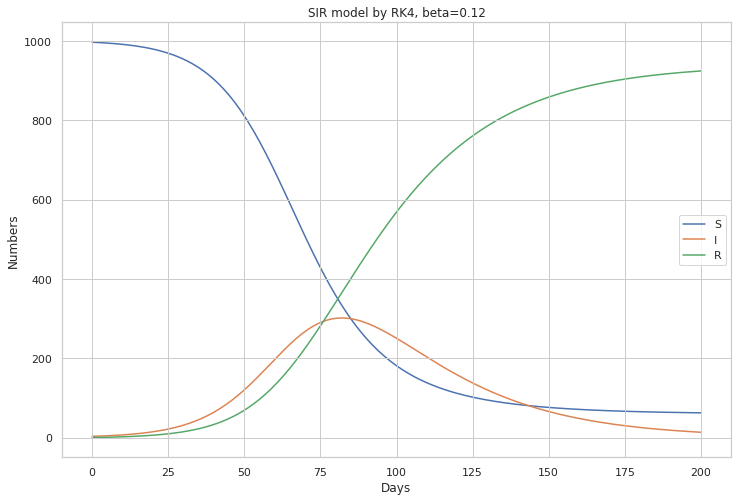

In [67]:
beta = 0.12
N0 = 1000
gama = 0.04
test1 = RK4_SIR_model(997,3,0,1000,200,1)
test1
print("Ro = " + str(beta*500/gama))
plt.figure(figsize=(12,8))
sns.lineplot(x = x, y = test1["S"])
sns.lineplot(x = x, y = test1["I"])
sns.lineplot(x = x, y = test1["R"])
plt.title("SIR model by RK4, beta=0.12")
plt.xlabel("Days")
plt.ylabel("Numbers")
plt.legend(["S","I","R"])

Ro = 2500.0


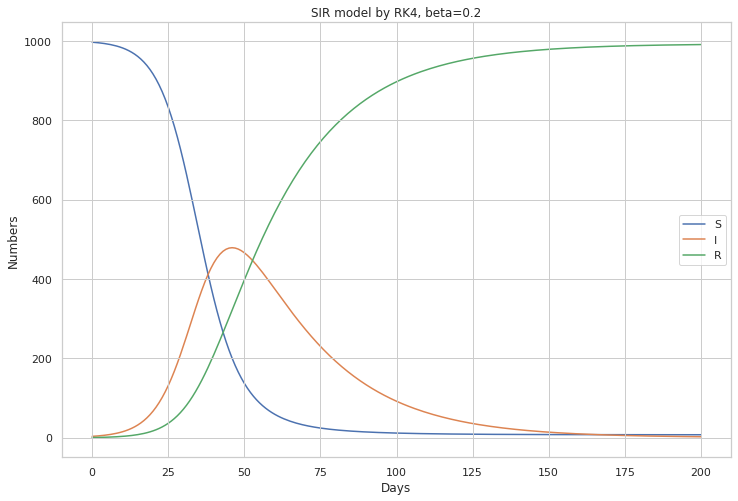

In [68]:
beta = 0.2
N0 = 1000
gama = 0.04
test1 = RK4_SIR_model(997,3,0,1000,200,1)
test1
print("Ro = " + str(beta*500/gama))
plt.figure(figsize=(12,8))
sns.lineplot(x = x, y = test1["S"])
sns.lineplot(x = x, y = test1["I"])
sns.lineplot(x = x, y = test1["R"])
plt.title("SIR model by RK4, beta=0.2")
plt.xlabel("Days")
plt.ylabel("Numbers")
plt.legend(["S","I","R"])

Ro = 3750.0


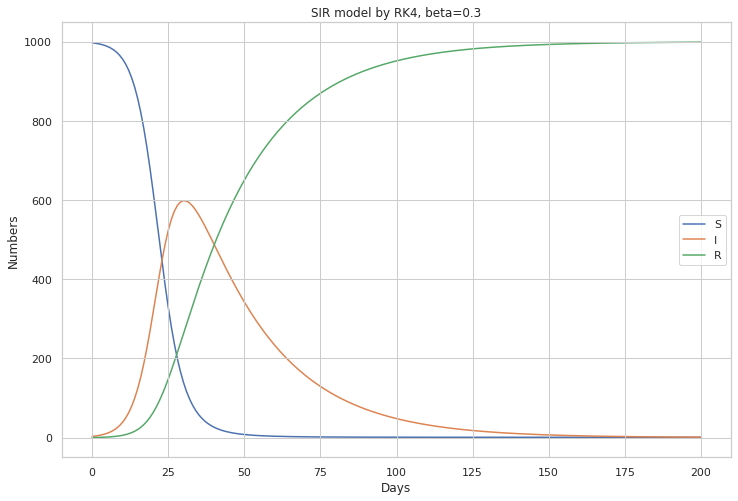

In [69]:
beta = 0.3
N0 = 1000
gama = 0.04
test1 = RK4_SIR_model(997,3,0,1000,200,1)
test1
print("Ro = " + str(beta*500/gama))
plt.figure(figsize=(12,8))
sns.lineplot(x = x, y = test1["S"])
sns.lineplot(x = x, y = test1["I"])
sns.lineplot(x = x, y = test1["R"])
plt.title("SIR model by RK4, beta=0.3")
plt.xlabel("Days")
plt.ylabel("Numbers")
plt.legend(["S","I","R"])

Ro = 5000.0


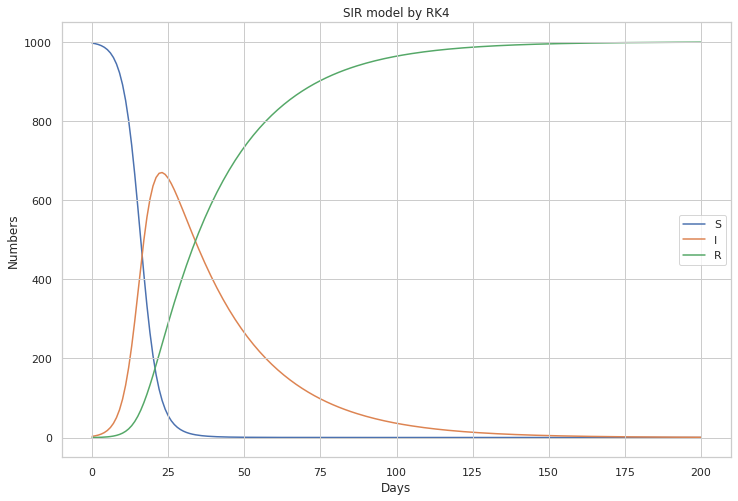

In [70]:
beta = 0.4
N0 = 1000
gama = 0.04
test1 = RK4_SIR_model(997,3,0,1000,200,1)
test1
print("Ro = " + str(beta*500/gama))
plt.figure(figsize=(12,8))
sns.lineplot(x = x, y = test1["S"])
sns.lineplot(x = x, y = test1["I"])
sns.lineplot(x = x, y = test1["R"])
plt.title("SIR model by RK4")
plt.xlabel("Days")
plt.ylabel("Numbers")
plt.legend(["S","I","R"])

Ro = 6250.0


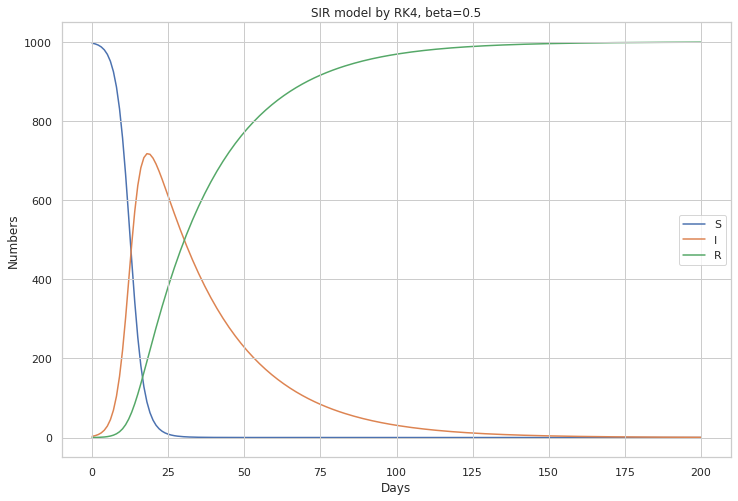

In [71]:
beta = 0.5
N0 = 1000
gama = 0.04
test1 = RK4_SIR_model(997,3,0,1000,200,1)
test1
print("Ro = " + str(beta*500/gama))
plt.figure(figsize=(12,8))
sns.lineplot(x = x, y = test1["S"])
sns.lineplot(x = x, y = test1["I"])
sns.lineplot(x = x, y = test1["R"])
plt.title("SIR model by RK4, beta=0.5")
plt.xlabel("Days")
plt.ylabel("Numbers")
plt.legend(["S","I","R"])

### Test 3
beta = 0.2

N0 = 1000

gama from 0.04 to 0.10

Ro = 2500.0


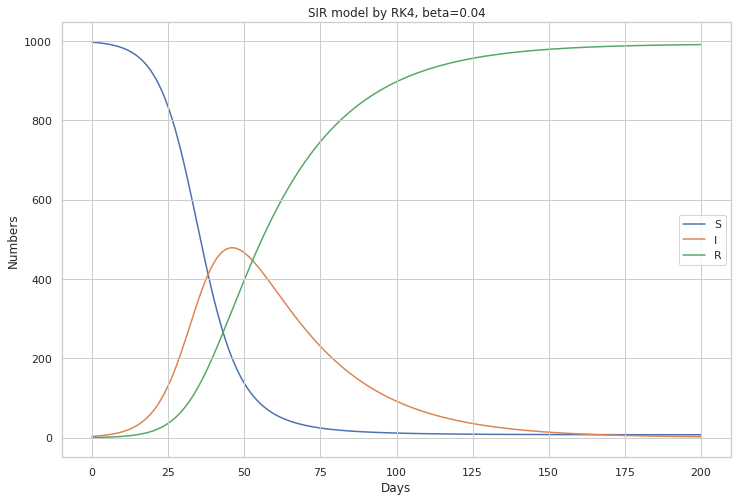

In [72]:
beta = 0.2
N0 = 1000
gama = 0.04
test1 = RK4_SIR_model(997,3,0,1000,200,1)
test1
print("Ro = " + str(beta*500/gama))
plt.figure(figsize=(12,8))
sns.lineplot(x = x, y = test1["S"])
sns.lineplot(x = x, y = test1["I"])
sns.lineplot(x = x, y = test1["R"])
plt.title("SIR model by RK4, beta=0.04")
plt.xlabel("Days")
plt.ylabel("Numbers")
plt.legend(["S","I","R"])

Ro = 2000.0


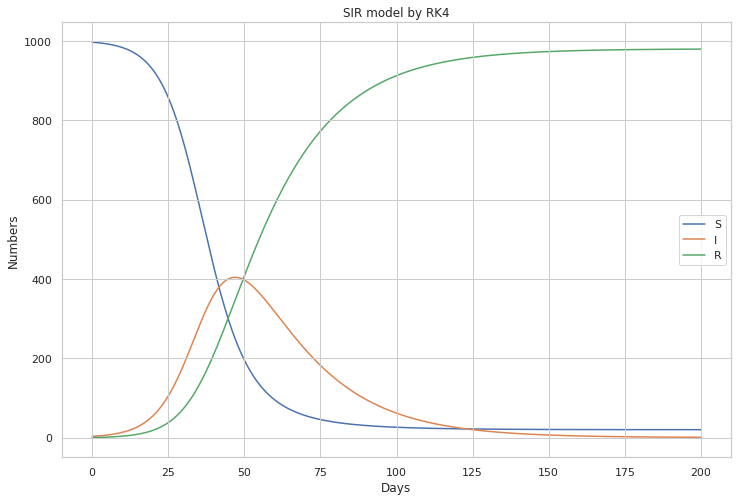

In [73]:
beta = 0.2
N0 = 1000
gama = 0.05
test1 = RK4_SIR_model(997,3,0,1000,200,1)
test1
print("Ro = " + str(beta*500/gama))
plt.figure(figsize=(12,8))
sns.lineplot(x = x, y = test1["S"])
sns.lineplot(x = x, y = test1["I"])
sns.lineplot(x = x, y = test1["R"])
plt.title("SIR model by RK4")
plt.xlabel("Days")
plt.ylabel("Numbers")
plt.legend(["S","I","R"])

Ro = 1666.6666666666667


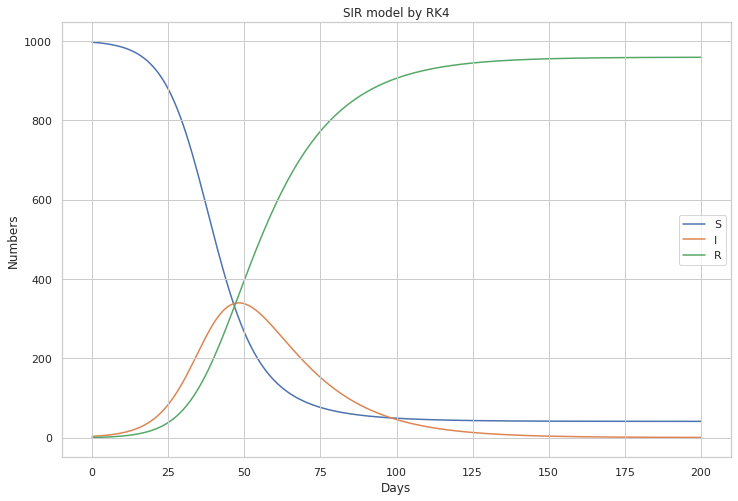

In [74]:
beta = 0.2
N0 = 1000
gama = 0.06
test1 = RK4_SIR_model(997,3,0,1000,200,1)
test1
print("Ro = " + str(beta*500/gama))
plt.figure(figsize=(12,8))
sns.lineplot(x = x, y = test1["S"])
sns.lineplot(x = x, y = test1["I"])
sns.lineplot(x = x, y = test1["R"])
plt.title("SIR model by RK4")
plt.xlabel("Days")
plt.ylabel("Numbers")
plt.legend(["S","I","R"])

Ro = 1428.5714285714284


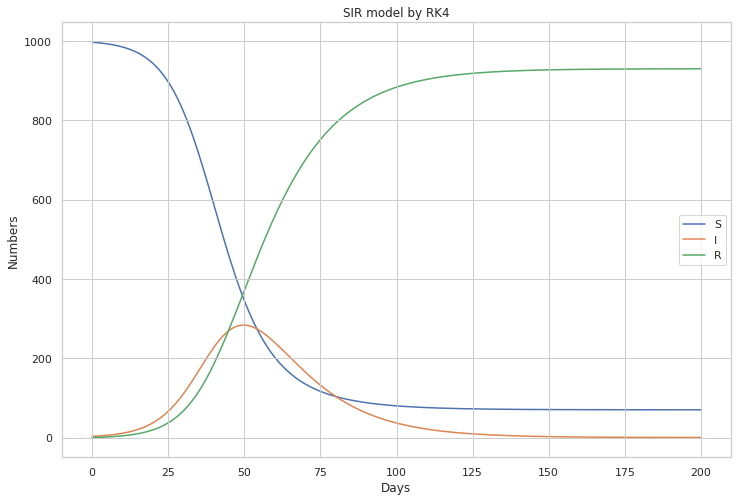

In [75]:
beta = 0.2
N0 = 1000
gama = 0.07
test1 = RK4_SIR_model(997,3,0,1000,200,1)
test1
print("Ro = " + str(beta*500/gama))
plt.figure(figsize=(12,8))
sns.lineplot(x = x, y = test1["S"])
sns.lineplot(x = x, y = test1["I"])
sns.lineplot(x = x, y = test1["R"])
plt.title("SIR model by RK4")
plt.xlabel("Days")
plt.ylabel("Numbers")
plt.legend(["S","I","R"])

Ro = 1111.111111111111


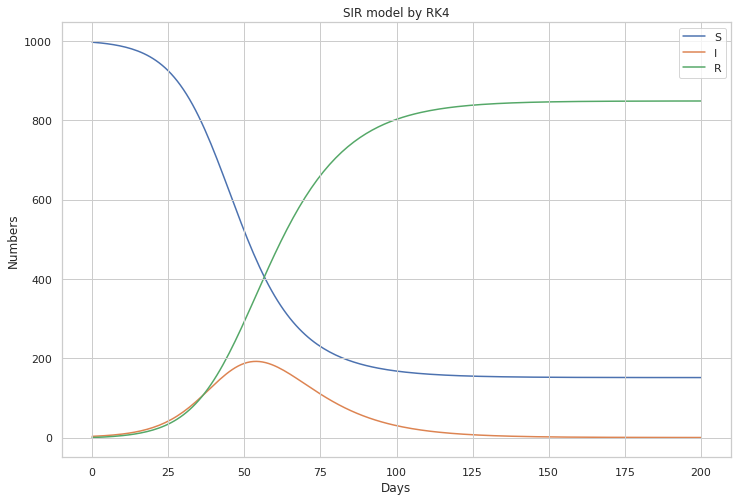

In [76]:
beta = 0.2
N0 = 1000
gama = 0.09
test1 = RK4_SIR_model(997,3,0,1000,200,1)
test1
print("Ro = " + str(beta*500/gama))
plt.figure(figsize=(12,8))
sns.lineplot(x = x, y = test1["S"])
sns.lineplot(x = x, y = test1["I"])
sns.lineplot(x = x, y = test1["R"])
plt.title("SIR model by RK4")
plt.xlabel("Days")
plt.ylabel("Numbers")
plt.legend(["S","I","R"])

Ro = 1111.111111111111


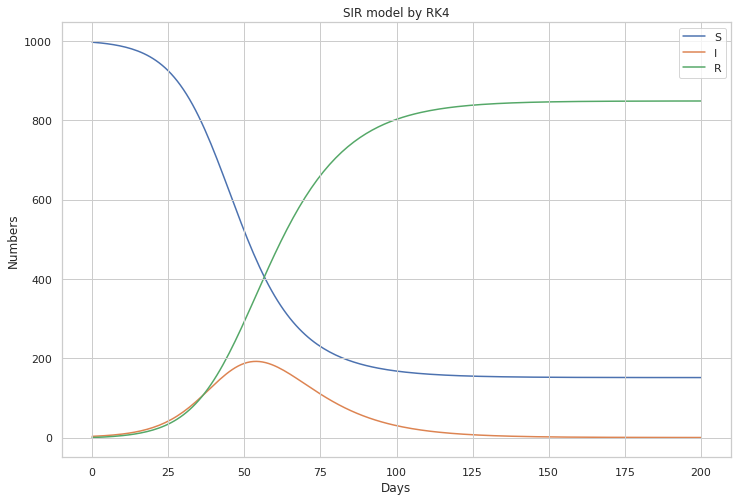

In [77]:
beta = 0.2
N0 = 1000
gama = 0.09
test1 = RK4_SIR_model(997,3,0,1000,200,1)
test1
print("Ro = " + str(beta*500/gama))
plt.figure(figsize=(12,8))
sns.lineplot(x = x, y = test1["S"])
sns.lineplot(x = x, y = test1["I"])
sns.lineplot(x = x, y = test1["R"])
plt.title("SIR model by RK4")
plt.xlabel("Days")
plt.ylabel("Numbers")
plt.legend(["S","I","R"])

Ro = 1000.0


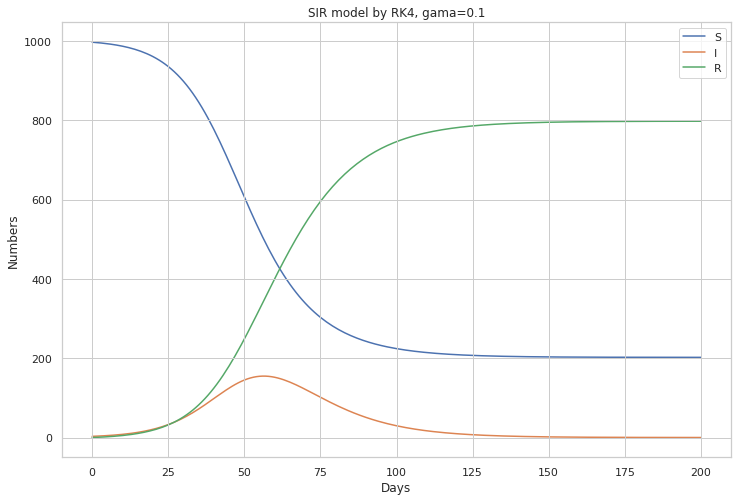

In [78]:
beta = 0.2
N0 = 1000
gama = 0.1
test1 = RK4_SIR_model(997,3,0,1000,200,1)
test1
print("Ro = " + str(beta*500/gama))
plt.figure(figsize=(12,8))
sns.lineplot(x = x, y = test1["S"])
sns.lineplot(x = x, y = test1["I"])
sns.lineplot(x = x, y = test1["R"])
plt.title("SIR model by RK4, gama=0.1")
plt.xlabel("Days")
plt.ylabel("Numbers")
plt.legend(["S","I","R"])

## Other method to write SIR model 

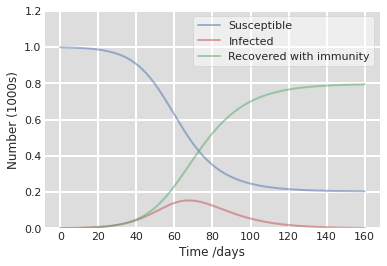

In [79]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

# **Question 2**

##Load packges


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

I use the html code of the "https://www.worldometers.info/coronavirus/country/singapore/ " to get the covid-19 data of Singapore. And then put the html data into excel.

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/BS6208 Big Data/covid19_SG.xlsx")
data

,Date,Cases,Active,Death,New
0,2020-02-15,72,54,0,NaN
1,2020-02-16,75,56,0,3.0
2,2020-02-17,77,53,0,2.0
3,2020-02-18,81,52,0,4.0
4,2020-02-19,84,50,0,3.0
...,...,...,...,...,...
383,2021-03-04,59998,112,29,19.0
384,2021-03-05,60007,108,29,9.0
385,2021-03-06,60020,112,29,13.0
386,2021-03-07,60033,110,29,13.0


In [ ]:
data[data["Date"]=="2020-06-30"].index

Int64Index([136], dtype='int64')

In [ ]:
df_covid = data.iloc[0:137]
df_covid

,Date,Cases,Active,Death,New
0,2020-02-15,72,54,0,NaN
1,2020-02-16,75,56,0,3.0
2,2020-02-17,77,53,0,2.0
3,2020-02-18,81,52,0,4.0
4,2020-02-19,84,50,0,3.0
...,...,...,...,...,...
132,2020-06-26,42955,6104,26,219.0
133,2020-06-27,43246,6057,26,291.0
134,2020-06-28,43459,5925,26,213.0
135,2020-06-29,43661,5650,26,202.0


## Plot the Covid-19 data in Singapore

(array([737477., 737485., 737506., 737516., 737537., 737546., 737567.,
        737577., 737598., 737607.]),
 <a list of 10 Text major ticklabel objects>)

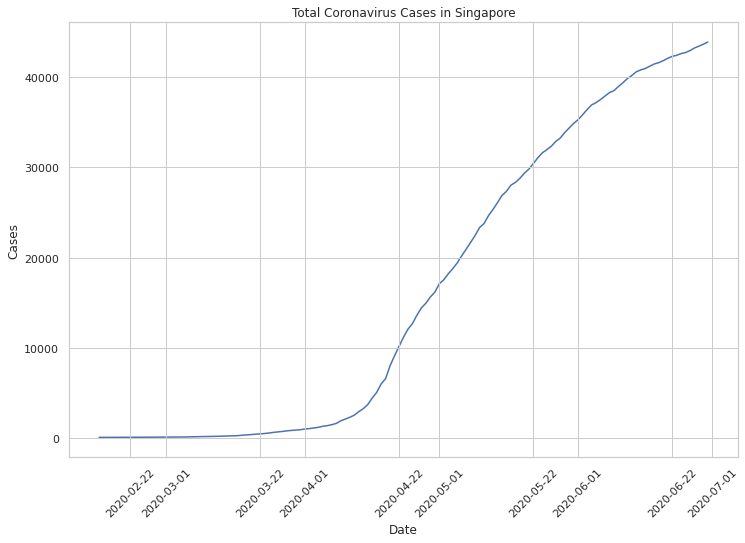

In [ ]:
# Total Coronavirus Cases in Singapore
sns.set(context="notebook", style="whitegrid",
        rc={"axes.axisbelow": False})

plt.figure(figsize=(12,8))
sns.lineplot(x = df_covid["Date"], y = df_covid["Cases"])
plt.title("Total Coronavirus Cases in Singapore")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.xticks(rotation=45)

(array([737477., 737485., 737506., 737516., 737537., 737546., 737567.,
        737577., 737598., 737607.]),
 <a list of 10 Text major ticklabel objects>)

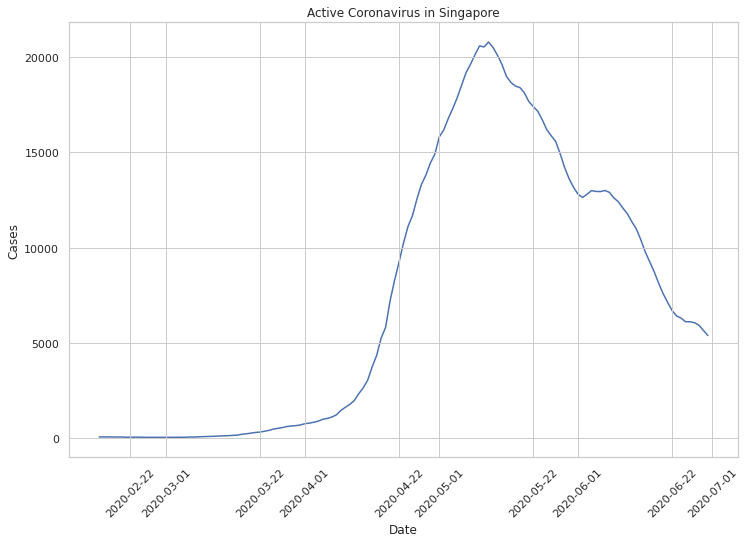

In [ ]:
# Active Coronavirus in Singapore
plt.figure(figsize=(12,8))
sns.lineplot(x = df_covid["Date"], y = df_covid["Active"])
plt.title("Active Coronavirus in Singapore")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.xticks(rotation=45)

(array([737477., 737485., 737506., 737516., 737537., 737546., 737567.,
        737577., 737598., 737607.]),
 <a list of 10 Text major ticklabel objects>)

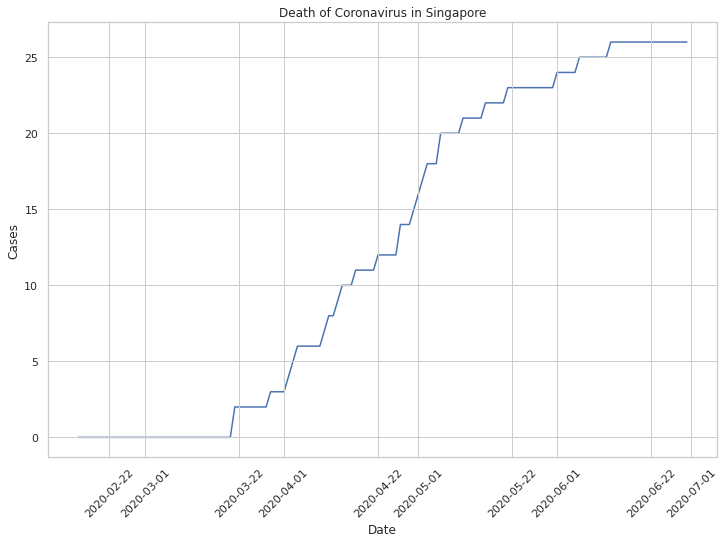

In [ ]:
# Death of Coronavirus in Singapore
plt.figure(figsize=(12,8))
sns.lineplot(x = df_covid["Date"], y = df_covid["Death"])
plt.title("Death of Coronavirus in Singapore")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.xticks(rotation=45)

(array([737477., 737485., 737506., 737516., 737537., 737546., 737567.,
        737577., 737598., 737607.]),
 <a list of 10 Text major ticklabel objects>)

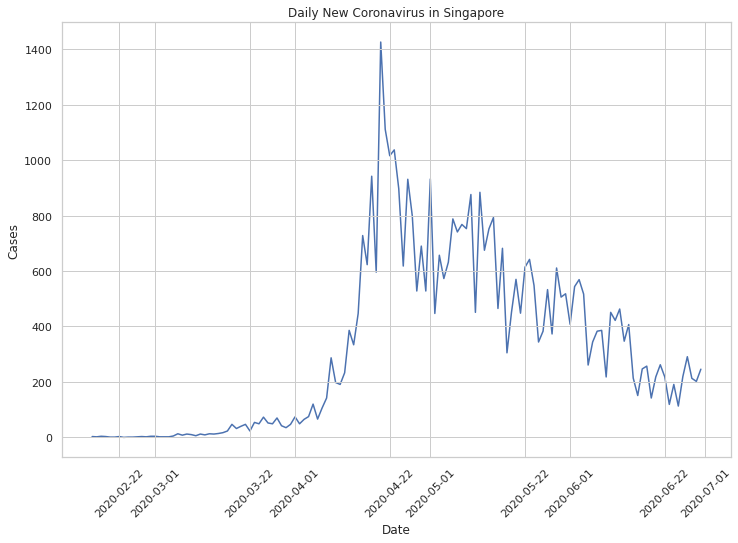

In [ ]:
# Daily New Coronavirus in Singapore
plt.figure(figsize=(12,8))
sns.lineplot(x = df_covid["Date"], y = df_covid["New"])
plt.title("Daily New Coronavirus in Singapore")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.xticks(rotation=45)

## Plot the data of real world 

In [ ]:
df_covid["S"] = 5850342 - df_covid["Cases"]
df_covid["I"] = df_covid["Active"]
df_covid["R"] = df_covid["Cases"] - df_covid["Active"] - df_covid["Death"]
df_covid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Date,Cases,Active,Death,New,S,I,R
0,2020-02-15,72,54,0,NaN,5850270,54,18
1,2020-02-16,75,56,0,3.0,5850267,56,19
2,2020-02-17,77,53,0,2.0,5850265,53,24
3,2020-02-18,81,52,0,4.0,5850261,52,29
4,2020-02-19,84,50,0,3.0,5850258,50,34
...,...,...,...,...,...,...,...,...
132,2020-06-26,42955,6104,26,219.0,5807387,6104,36825
133,2020-06-27,43246,6057,26,291.0,5807096,6057,37163
134,2020-06-28,43459,5925,26,213.0,5806883,5925,37508
135,2020-06-29,43661,5650,26,202.0,5806681,5650,37985


(array([737477., 737485., 737506., 737516., 737537., 737546., 737567.,
        737577., 737598., 737607.]),
 <a list of 10 Text major ticklabel objects>)

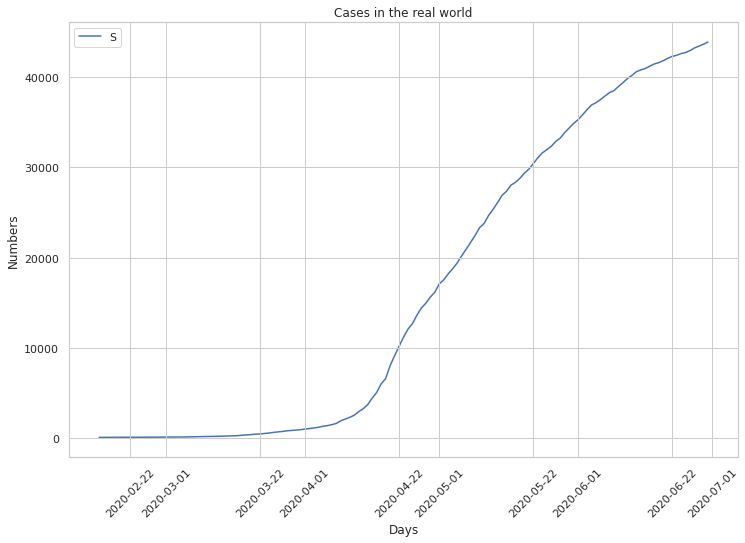

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(x = df_covid["Date"], y = df_covid["Cases"])
plt.title("Cases in the real world")
plt.xlabel("Days")
plt.ylabel("Numbers")
plt.legend(["S","I","R"])
plt.xticks(rotation=45)

In [ ]:
df_covid_SIR = df_covid.drop(["Cases","Active","Death","New"],axis=1)
df_covid_SIR

,Date,S,I,R
0,2020-02-15,5850270,54,18
1,2020-02-16,5850267,56,19
2,2020-02-17,5850265,53,24
3,2020-02-18,5850261,52,29
4,2020-02-19,5850258,50,34
...,...,...,...,...
132,2020-06-26,5807387,6104,36825
133,2020-06-27,5807096,6057,37163
134,2020-06-28,5806883,5925,37508
135,2020-06-29,5806681,5650,37985


(array([737477., 737485., 737506., 737516., 737537., 737546., 737567.,
        737577., 737598., 737607.]),
 <a list of 10 Text major ticklabel objects>)

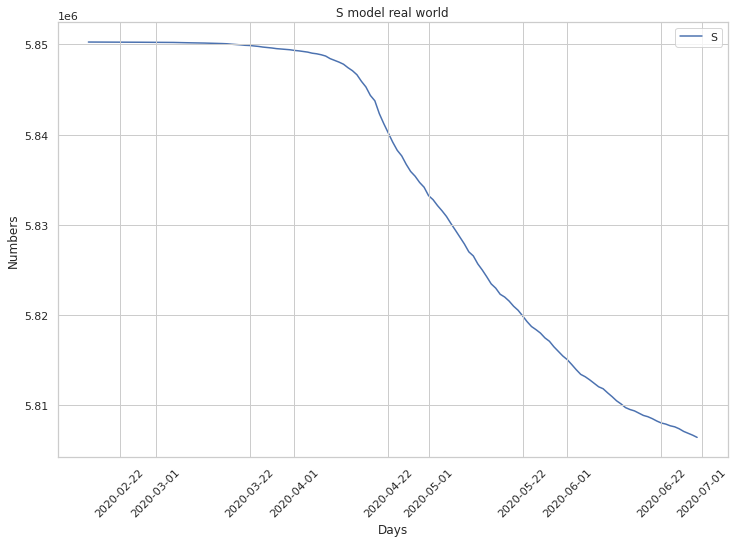

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(x = df_covid_SIR["Date"], y = df_covid_SIR["S"])
# sns.lineplot(x = df_covid_SIR["Date"], y = df_covid_SIR["I"])
# sns.lineplot(x = df_covid_SIR["Date"], y = df_covid_SIR["R"])
plt.title("S model real world")
plt.xlabel("Days")
plt.ylabel("Numbers")
plt.legend(["S","I","R"])
plt.xticks(rotation=45)

(array([737477., 737485., 737506., 737516., 737537., 737546., 737567.,
        737577., 737598., 737607.]),
 <a list of 10 Text major ticklabel objects>)

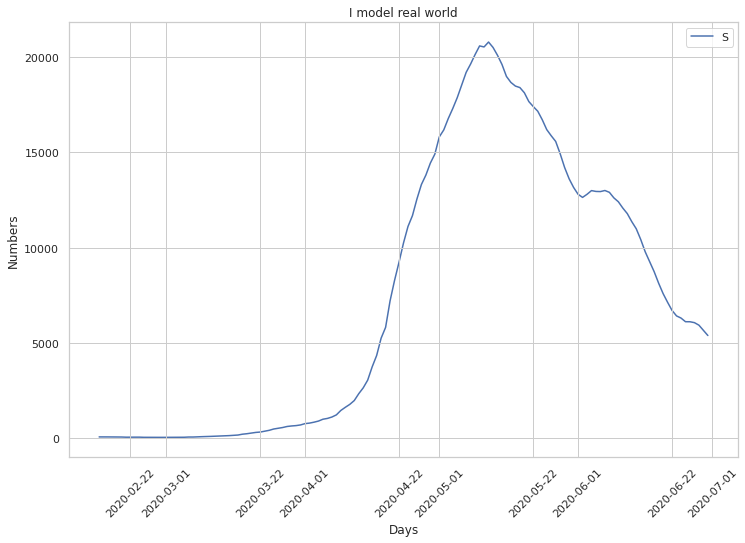

In [ ]:
plt.figure(figsize=(12,8))
#sns.lineplot(x = df_covid_SIR["Date"], y = df_covid_SIR["S"])
sns.lineplot(x = df_covid_SIR["Date"], y = df_covid_SIR["I"])
#sns.lineplot(x = df_covid_SIR["Date"], y = df_covid_SIR["R"])
plt.title("I model real world")
plt.xlabel("Days")
plt.ylabel("Numbers")
plt.legend(["S","I","R"])
plt.xticks(rotation=45)

(array([737477., 737485., 737506., 737516., 737537., 737546., 737567.,
        737577., 737598., 737607.]),
 <a list of 10 Text major ticklabel objects>)

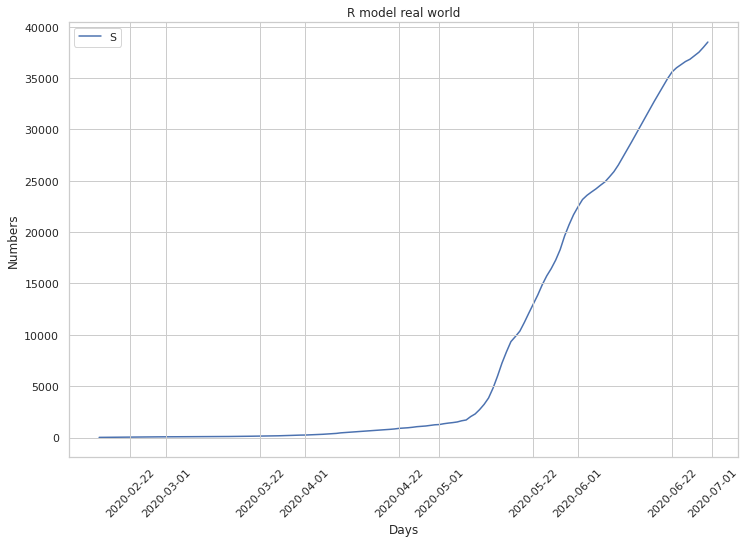

In [ ]:
plt.figure(figsize=(12,8))
#sns.lineplot(x = df_covid_SIR["Date"], y = df_covid_SIR["S"])
#sns.lineplot(x = df_covid_SIR["Date"], y = df_covid_SIR["I"])
sns.lineplot(x = df_covid_SIR["Date"], y = df_covid_SIR["R"])
plt.title("R model real world")
plt.xlabel("Days")
plt.ylabel("Numbers")
plt.legend(["S","I","R"])
plt.xticks(rotation=45)

(array([737477., 737485., 737506., 737516., 737537., 737546., 737567.,
        737577., 737598., 737607.]),
 <a list of 10 Text major ticklabel objects>)

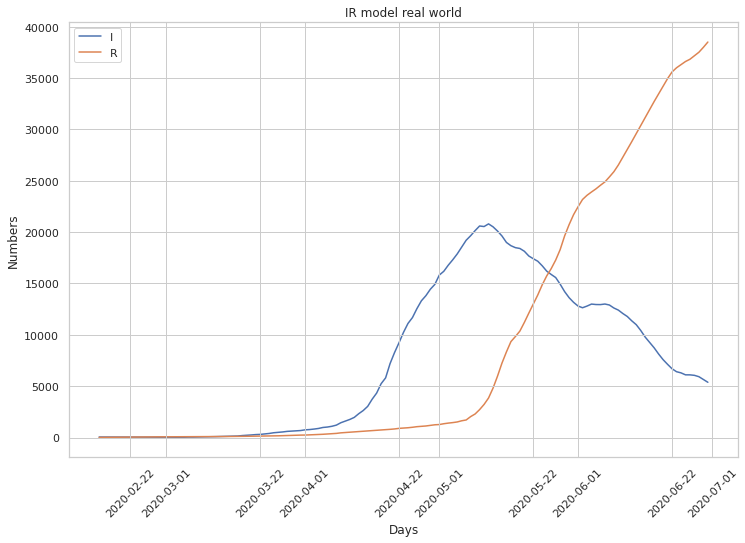

In [ ]:
plt.figure(figsize=(12,8))
#sns.lineplot(x = df_covid_SIR["Date"], y = df_covid_SIR["S"])
sns.lineplot(x = df_covid_SIR["Date"], y = df_covid_SIR["I"])
sns.lineplot(x = df_covid_SIR["Date"], y = df_covid_SIR["R"])
plt.title("IR model real world")
plt.xlabel("Days")
plt.ylabel("Numbers")
plt.legend(["I","R"])
plt.xticks(rotation=45)

(array([737477., 737485., 737506., 737516., 737537., 737546., 737567.,
        737577., 737598., 737607.]),
 <a list of 10 Text major ticklabel objects>)

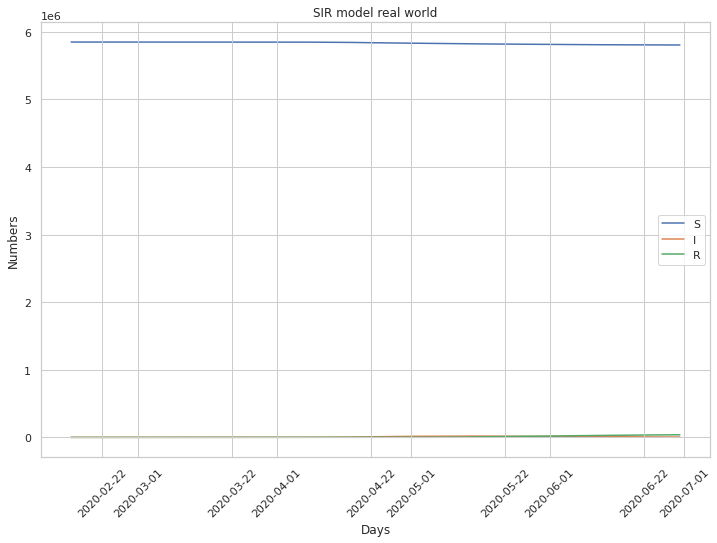

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(x = df_covid_SIR["Date"], y = df_covid_SIR["S"])
sns.lineplot(x = df_covid_SIR["Date"], y = df_covid_SIR["I"])
sns.lineplot(x = df_covid_SIR["Date"], y = df_covid_SIR["R"])
plt.title("SIR model real world")
plt.xlabel("Days")
plt.ylabel("Numbers")
plt.legend(["S","I","R"])
plt.xticks(rotation=45)

## Use RK4-SIR model to make a prediction for Covid-19 in Singapore
N = Sigapore population (5850342)

beta = 

gama = 

In [ ]:
x = []
for m in range(0,139):
  x.append(m)

Ro = 3750.0


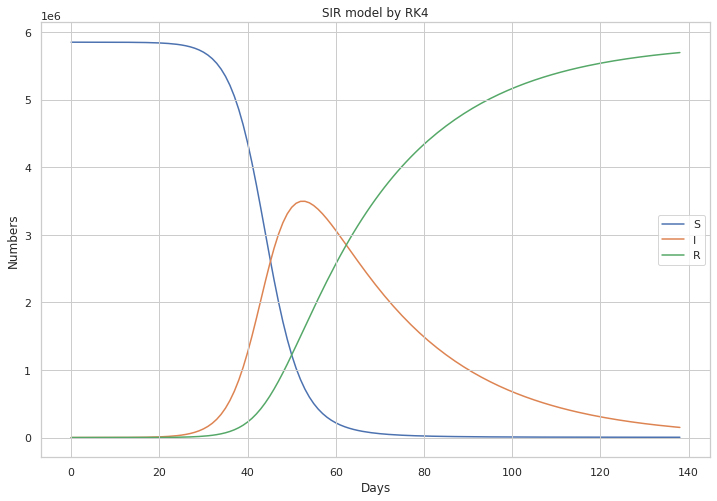

In [ ]:
beta = 0.3
N0 = 5850342
gama = 0.04
test1 = RK4_SIR_model(5850342-54,54,0,5850342,138,1)
test1
print("Ro = " + str(beta*500/gama))
plt.figure(figsize=(12,8))
sns.lineplot(x = x, y = test1["S"])
sns.lineplot(x = x, y = test1["I"])
sns.lineplot(x = x, y = test1["R"])
plt.title("SIR model by RK4")
plt.xlabel("Days")
plt.ylabel("Numbers")
plt.legend(["S","I","R"])

Ro = 3750.0


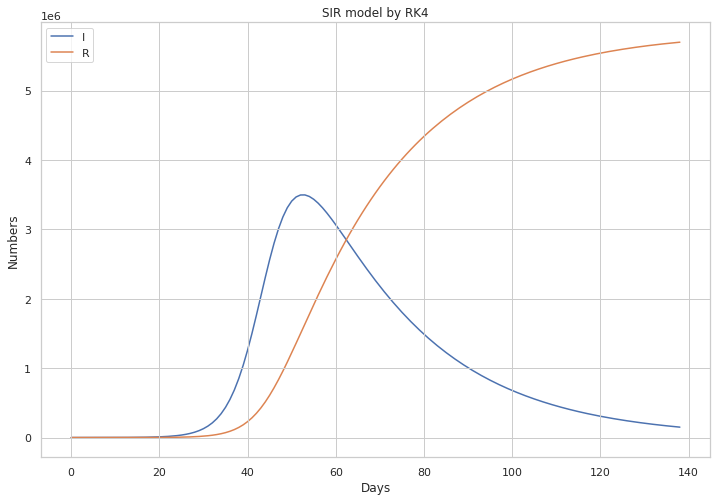

In [ ]:
beta = 0.3
N0 = 5850342
gama = 0.04
test1 = RK4_SIR_model(5850342-54,54,0,5850342,138,1)
test1
print("Ro = " + str(beta*500/gama))
plt.figure(figsize=(12,8))
#sns.lineplot(x = x, y = test1["S"])
sns.lineplot(x = x, y = test1["I"])
sns.lineplot(x = x, y = test1["R"])
plt.title("SIR model by RK4")
plt.xlabel("Days")
plt.ylabel("Numbers")
plt.legend(["I","R"])

### I will use Least squares to find the best parameters in next assignment.